In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


### Loading Data
gold = pd.read_csv("/Users/yoseff/Pycharmprojects/GoldProject/GC=F.csv")
usd_index = pd.read_csv("/Users/yoseff/Pycharmprojects/GoldProject/DX-Y.NYB.csv")

In [16]:
gold.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [11]:
gold.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [17]:
usd_index.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-29,111.449997,112.349998,111.309998,112.199997,112.199997,0
1,2000-08-30,112.190002,112.779999,112.110001,112.139999,112.139999,0
2,2000-08-31,111.980003,112.930000,111.779999,112.599998,112.599998,0
3,2000-09-01,112.360001,112.599998,111.250000,111.419998,111.419998,0
4,2000-09-05,111.610001,112.769997,111.500000,112.410004,112.410004,0


In [18]:
usd_index.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Cleaning

In [112]:
## Checking for missing values
print("Missing values in gold data:")
print(gold.isnull().sum())

print("\nMissing values in USD index data:")
print(usd_index.isnull().sum())

Missing values in gold data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in USD index data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Data PreProcessing

In [153]:
## Convert Date columns to datetime objects
gold['Date'] = pd.to_datetime(gold['Date'])
usd_index['Date'] = pd.to_datetime(usd_index['Date'])


In [115]:
## Check for duplicates
print("Duplicate rows in gold data:", gold.duplicated().sum())
print("Duplicate rows in USD index data:", usd_index.duplicated().sum())

Duplicate rows in gold data: 0
Duplicate rows in USD index data: 0


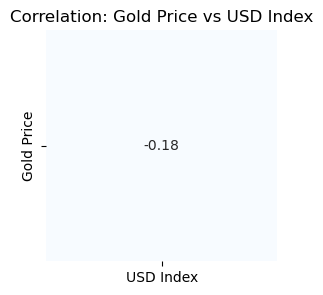

In [154]:
## Rename 'Close' columns
gold.rename(columns={'Close': 'Gold Price'}, inplace=True)
usd_index.rename(columns={'Close': 'USD Index'}, inplace=True)

# Select the subset of the correlation matrix
corr_subset = corr_matrix.loc[['Gold Price'], ['USD Index']]

# Plot the subset
plt.figure(figsize=(6, 3))
sns.heatmap(corr_subset, annot=True, cmap = 'Blues', square=True, cbar = False)
plt.title('Correlation: Gold Price vs USD Index')
plt.xticks()
plt.yticks()
plt.show()

In [155]:
## Merge the dataframes on Date (using index)
merged_gold_usd = gold.merge(usd_index, how='inner', on = 'Date')


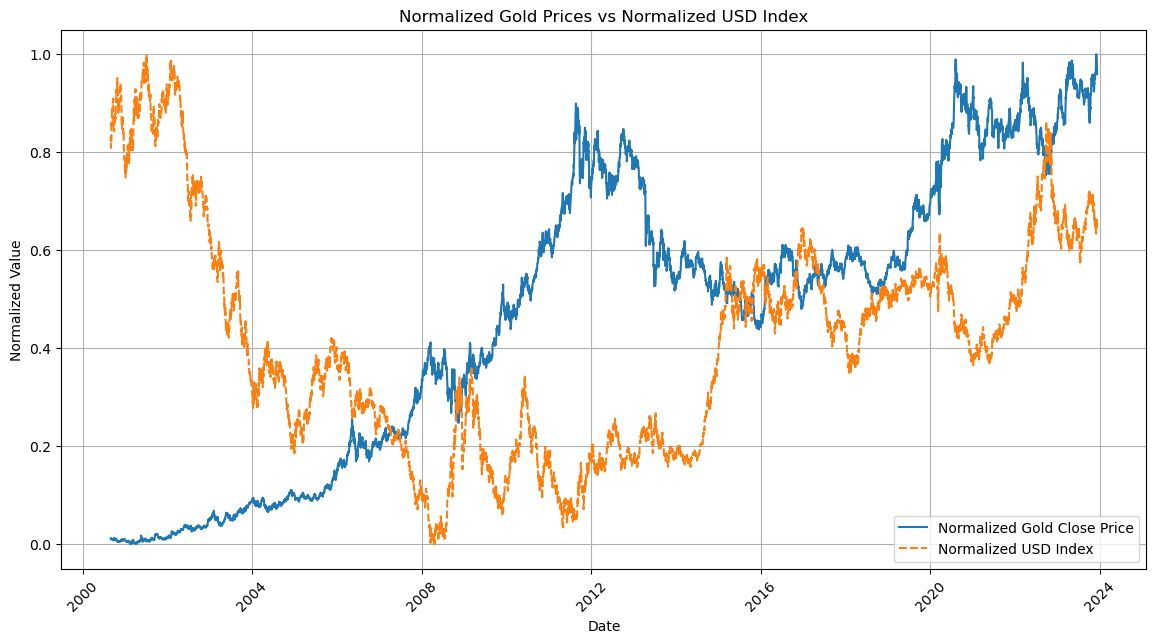

In [156]:
merged_gold_usd['Gold Close Normalized'] = (merged_gold_usd['Gold Price'] - merged_gold_usd['Gold Price'].min()) / (merged_gold_usd['Gold Price'].max() - merged_gold_usd['Gold Price'].min())
merged_gold_usd['USD Index Normalized'] = (merged_gold_usd['USD Index'] - merged_gold_usd['USD Index'].min()) / (merged_gold_usd['USD Index'].max() - merged_gold_usd['USD Index'].min())

#setting date as index
merged_gold_usd.set_index(merged_gold_usd['Date'])

# Convert the index to datetime index
merged_gold_usd.index = pd.to_datetime(merged_gold_usd.index)



plt.figure(figsize=(14,7))
plt.plot(merged_gold_usd['Date'], merged_gold_usd['Gold Close Normalized'], label = 'Normalized Gold Close Price')
plt.plot(merged_gold_usd['Date'], merged_gold_usd['USD Index Normalized'], label = 'Normalized USD Index', linestyle = '--')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Gold Prices vs Normalized USD Index')
plt.legend()
plt.grid(True)
plt.show()

# Graph Interpretation
Through the correlation matrix as well as the normalized price comparison, we prove that gold is inversely related to the USD index. As the US dollar becomes stronger, gold prices fall and as the US dollar grows weaker, gold prices rise.

1) Gold is often targeted as a safe-haven asset when facing currency strength. Investors tend to invest in gold during times of economic uncertainty or market volatility and the USD index measure the strenght of the US currency relative to a basket of other major currencies thus during periods of market instability, investors seek to invest in gold as it is a globally traded and highly sought after precious metal easily translatable to any other currency.

2) Investors  use gold as a hedge against currency inflation/depreciation. When the value of the US dollar decreases, the purchasing power of that dollar weakens and thus investors may turn to gold as a store of value to protect their wealth.

3) Interest rates impact gold in that high interest rates strengthen the US dollar as foreign investors buy in to seek high returns on investment. conversely, lower interest rates or accomomodative monetary policies such as the quantitative easing project put in place by the US Federal Reserve in 2013 tend to higher gold prices.



In [157]:
## Create simple moving average overlay
gold['SMA_50'] = gold['Gold Price'].rolling(window=50).mean()
gold['SMA_100'] = gold['Gold Price'].rolling(window=100).mean()
gold['SMA_200'] = gold['Gold Price'].rolling(window=200).mean()

In [158]:
#group by months and find average price over entire month based on closing price
gold['Date'] = pd.to_datetime(gold['Date'])

gold.set_index(gold['Date'], inplace = True)


gold_grouped_monthly = gold.groupby(pd.Grouper(freq = 'M')).mean()
gold_grouped_monthly.drop(columns=['Date'], inplace=True)


gold_grouped_monthly

,Open,High,Low,Gold Price,Adj Close,Volume,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,
2000-08-31,274.349991,276.099991,274.349991,276.099991,276.099991,0.000000,NaN,NaN,NaN
2000-09-30,273.534996,273.534996,273.284996,273.389996,273.389996,214.550000,NaN,NaN,NaN
2000-10-31,269.995454,270.436365,269.545453,269.809090,269.809090,14.590909,NaN,NaN,NaN
2000-11-30,265.824997,266.064998,265.624997,265.874997,265.874997,1623.250000,269.593331,NaN,NaN
2000-12-31,271.510004,272.190001,270.830005,271.515005,271.515005,83.200000,268.511700,NaN,NaN
2001-01-31,265.228569,265.442855,265.157141,265.371427,265.371427,848.142857,268.251144,269.250666,NaN
2001-02-28,261.852631,262.605262,260.815788,261.805263,261.805263,56.105263,266.975264,267.917737,NaN
2001-03-31,262.218181,262.431817,262.045455,262.290907,262.290907,1416.409091,263.730726,266.032682,NaN
2001-04-30,260.965001,262.009998,260.009999,261.079997,261.079997,86.650000,261.525998,264.758650,NaN


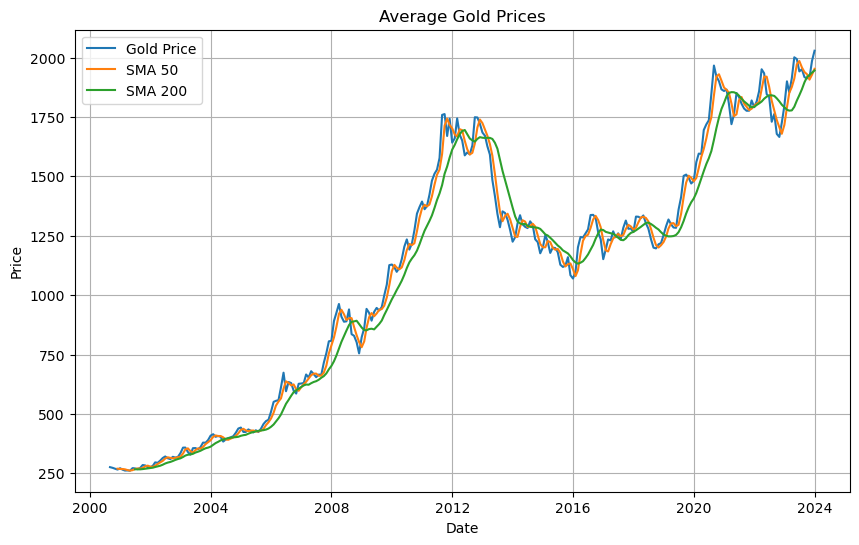

In [151]:
## Plot gold prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(gold_grouped_monthly.index, gold_grouped_monthly['Gold Price'], label='Gold Price')
plt.plot(gold_grouped_monthly.index, gold_grouped_monthly['SMA_50'], label='SMA 50')
plt.plot(gold_grouped_monthly.index, gold_grouped_monthly['SMA_200'], label='SMA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Gold Prices')
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

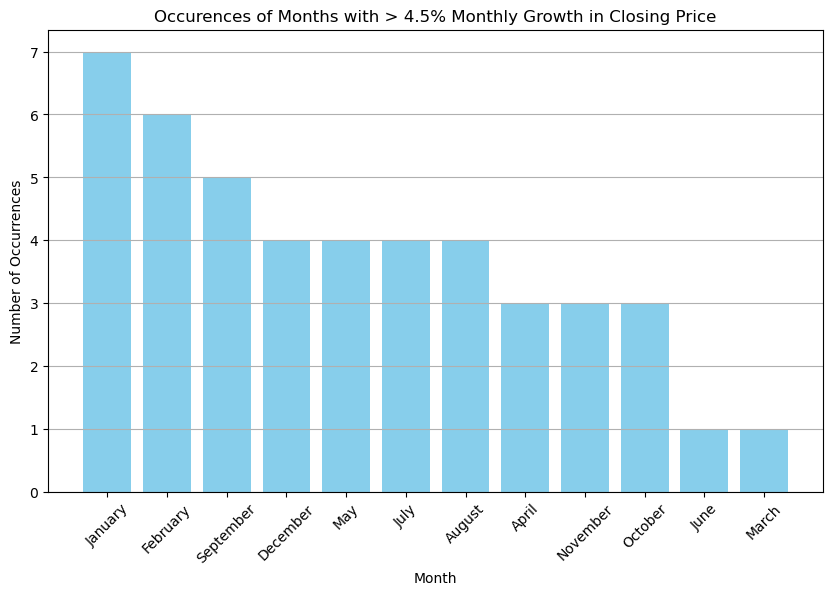

In [141]:
#Dictionary to convert Month numerical values to actual Name
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
              9: 'September', 10: 'October', 11: 'November', 12: 'December'}

#finding percent change per month
gold_grouped_monthly['Percent Change'] = (gold_grouped_monthly['Gold Price'].pct_change())*100

#find months with percent growth above 4.5% 
threshold = 4.5
months_surpassing_threshold = gold_grouped_monthly[gold_grouped_monthly['Percent Change'] > threshold]

#count number of occurences of each month irrelevant to the year
month_counts = months_surpassing_threshold.index.to_period("M").month.map(month_names).value_counts()

#month_counts

plt.figure(figsize=(10,6))
plt.bar(month_counts.index, month_counts.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurences of Months with > 4.5% Monthly Growth in Closing Price')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.show

#found that on average, January and February were top months to usually see an increase 
#in closing price by over 4.5% from month to month

In [159]:
gold.to_csv('processed_gold.csv', index=False) 
usd_index.to_csv('processed_usd_index.csv', index = False)
merged_gold_usd.to_csv('merged_gold_usd.csv', index = False)
gold_grouped_monthly.to_csv('grouped_monthly_gold.csv', index = False)